# Lecture 23 2018-11-06: Matplotlib

Plotting data with matplotlib package

In [2]:
import pandas as pd
from pandas import Series, DataFrame   # use these so often, this can be helpful

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import numpy as np
from numpy.random import randn

## Miscellaneous

Pandas DataFrames make it easy to group data by values, using the *level=* parameter in a computation.

### Get example data

In [4]:
# To only read certain columns, use *usecols*
x = pd.read_table('milk_summary.txt', 
                  comment='#', 
                  usecols=['sample_id', 'gc_content', 'country', 'gene_id'],
                  index_col='country'
                 )

x.head()

,sample_id,gc_content,gene_id
country,,,
PE,PE716,0.287770,ST6
PE,PE714,0.384342,ST6
ETU,ETU011,0.395683,ST6
ETR,ETR208,0.315412,ST6
PE,PE731,0.380783,ST6


### Get mean gc content by country

In [5]:
mean_by_country = x.mean(level='country')
mean_by_country

,gc_content
country,
ETR,0.445550
ETU,0.451564
GBR,0.457919
GBU,0.457202
GN,0.468612
KE,0.457715
PE,0.450601
SP,0.442890
SW,0.464215


### Get mean gc content by gene

In [6]:
x.reset_index(inplace=True)
x.reindex(['gene_id'])
x.head()

,country,sample_id,gc_content,gene_id
0,PE,PE716,0.287770,ST6
1,PE,PE714,0.384342,ST6
2,ETU,ETU011,0.395683,ST6
3,ETR,ETR208,0.315412,ST6
4,PE,PE731,0.380783,ST6


In [7]:
x.set_index('gene_id', inplace=True)
x.head()

,country,sample_id,gc_content
gene_id,,,
ST6,PE,PE716,0.287770
ST6,PE,PE714,0.384342
ST6,ETU,ETU011,0.395683
ST6,ETR,ETR208,0.315412
ST6,PE,PE731,0.380783


In [8]:
mean_by_gene = x.mean(level='gene_id')
mean_by_country

,gc_content
country,
ETR,0.445550
ETU,0.451564
GBR,0.457919
GBU,0.457202
GN,0.468612
KE,0.457715
PE,0.450601
SP,0.442890
SW,0.464215


## Exercise with real data

In [5]:
!head microbiome_data.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
x=pd.read_csv('microbiome_data.txt', 
              comment='#', 
              sep='\t', 
              header=0,
              index_col=0
             )

# make useful sub-dataframes
x_abundances = x.iloc[:,:-3]
x_diversity = x.iloc[:,-3:]
x_abundances.head()

,Lactobacillus_crispatus,Lactobacillus_iners,Lactobacillus_gasseri,Lactobacillus_jensenii,Atopobium_vaginae,Megasphaera_sp._type_1,Streptococcus_anginosus,Prevotella_genogroup_3,Clostridiales,Enterococcus_faecalis,Corynebacterium_accolens
patientID,,,,,,,,,,,
AYAC01,0.494516,0.046142,0.001394,0.000831,0.099390,0.323563,0.000025,0.001861,0.013861,0.000073,0.018342
AYAC02,0.675226,0.284146,0.001843,0.037587,0.000045,0.000000,0.000029,0.000000,0.000000,0.000445,0.000680
AYAC03,0.298899,0.336644,0.000821,0.000069,0.143627,0.161324,0.000479,0.044008,0.004456,0.000041,0.009631
AYAC04,0.882867,0.091084,0.004370,0.021186,0.000000,0.000049,0.000025,0.000000,0.000105,0.000050,0.000265
AYAC05,0.001224,0.774687,0.001111,0.177701,0.000578,0.000000,0.029465,0.000000,0.000759,0.001376,0.013099


Create the figure and subplot

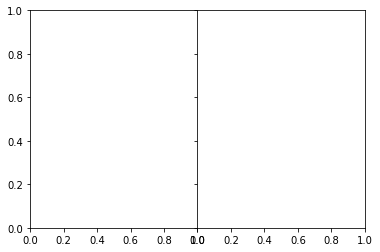

In [9]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig.subplots_adjust(wspace=0, hspace=0) # change figure width and height

### plot some data 

With old versions of matplotlib, the plot() method threw an exception trying to convert index names, which as strings, into floats, for the xticklabels. See *LN 22 old_matplotlib* for a workaround.

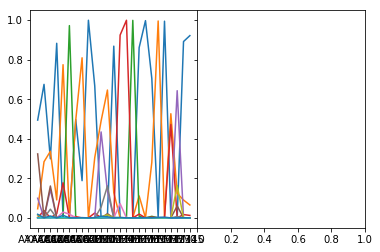

In [10]:
ax = axes[0]  # note that the fig is a 1-D array (list)

_ = ax.plot(x_abundances)

fig

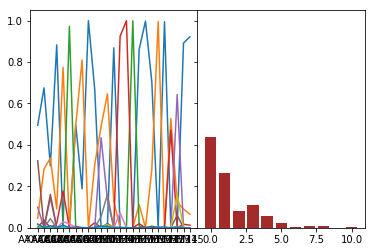

In [11]:
ax = axes[1]

abundance_averages = x_abundances.mean()
index = np.arange(len(abundance_averages))

_ = ax.bar(index, abundance_averages, color='brown')

fig

### Add some decorations, such as titles, and meaningful x labels

we do this by setting properties in the subplot(s) using *set_* methods. Useful ones are:

method | function
:----- | :-------
set_title('title') | sets the title for this subplot to 'title' (goes on top)
set_xlabel('label') | set the label for the x axis to 'label'
set_ylabel('label') | set the label for the y axis to 'label'
set_xticklables(labels) | set the label for each tick mark from the list labels
set_xticks(positions) | sets the positions for the tick marks on the x axis to 'positions'

Text-type values, such as in all the labels above and in the title, also have properties that you can set with parameters within these methods

Parameter | meaning
:-------- | :----------
color=c   | set the color to c
rotation=r | rotation r degrees
fontsize=s | set font size to s ('xx-small' up to 'xx-large' are all valid)

In [12]:
# look up info on some of these
#ax.set_title?
#ax.set_xticklabels?

### Work on second subplot (since we're there) 

Think about what we want on the subplot.



We want taxa names on the x axis, with one name per bar, in a readable orientation and font
These exist in

>abundance_averages.index


In [13]:
labels = [str(s).strip() for s in abundance_averages.index]
labels

['Lactobacillus_crispatus',
 'Lactobacillus_iners',
 'Lactobacillus_gasseri',
 'Lactobacillus_jensenii',
 'Atopobium_vaginae',
 'Megasphaera_sp._type_1',
 'Streptococcus_anginosus',
 'Prevotella_genogroup_3',
 'Clostridiales',
 'Enterococcus_faecalis',
 'Corynebacterium_accolens']

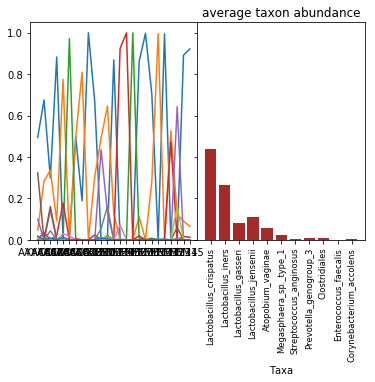

In [14]:
labels = ax.set_xticklabels(labels,
                       rotation=90,
                       fontsize='small')
ticks = ax.set_xticks(range(len(abundance_averages)))

title = ax.set_title('average taxon abundance')
_ = ax.set_xlabel('Taxa')

fig

### Work on first subplot

For the first one, we want patient IDs labeling the x axis, with one ID per patient, in a readable font and format. 

That information exists in 

>x_abundances.index

In [15]:
labels = [str(s).strip() for s in x_abundances.index]
labels

['AYAC01',
 'AYAC02',
 'AYAC03',
 'AYAC04',
 'AYAC05',
 'AYAC06',
 'AYAC07',
 'AYAC08',
 'AYAC09',
 'AYAC10',
 'EM01',
 'EM02',
 'EM03',
 'EM04',
 'EM05',
 'EM06',
 'EM07',
 'EM08',
 'EM09',
 'EM10',
 'EM11',
 'EM12',
 'EM13',
 'EM14',
 'EM15']

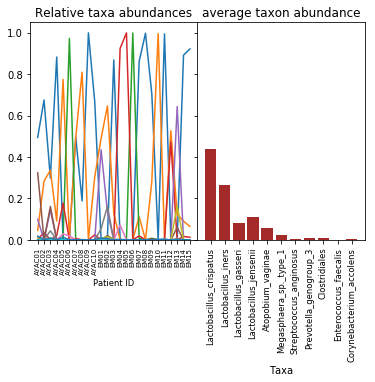

In [16]:
ax = axes[0] # the first plot

_ = ax.set_xticks(range(len(x_abundances)))
_ = ax.set_xticklabels(labels, rotation=90, fontsize='x-small')
_ = ax.set_xlabel('Patient ID', fontsize='small')
_ = ax.set_title('Relative taxa abundances')

fig

### add the legend

I play around with *loc=*, but there are several useful options.

In [17]:
ax.legend?

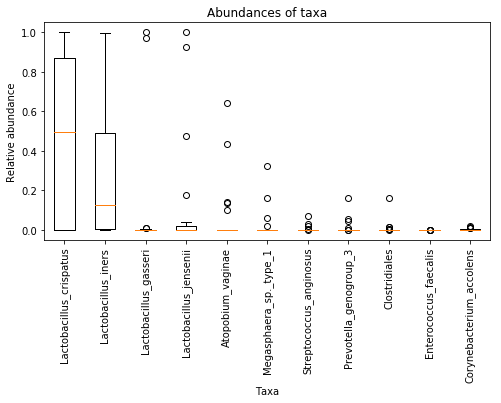

In [40]:
_ = ax.legend(x_abundances.columns, loc=(-1.5,0), title = 'taxa', fontsize='large')  # set the legend text

fig

### Add text and lines to help the readers

Useful methods

Method | meaning
:----- | :--------
annotate(text, (x,y)) | places 'text' at location (x,y). It has the usual text properties such as size, color, etc.
hlines(y, xmin, xmax) | draws a line at y-coordinate y, stretching from hmin to hmax
vlines(x, xmin, xmax) | draws a line at x-coordinate x, stretching from vmin to vmax

Fortunately, the min and max values you normally want are xlim and ylim, and you can get these with *ax.get_xlim()* and *ax.get_ylim()*.

In [41]:
ax_0.get_xlim()

(-2.5200000000000005, 26.52)

In [42]:
ax_0, ax_1 = axes   # just to make the code easier

TypeError: 'AxesSubplot' object is not iterable

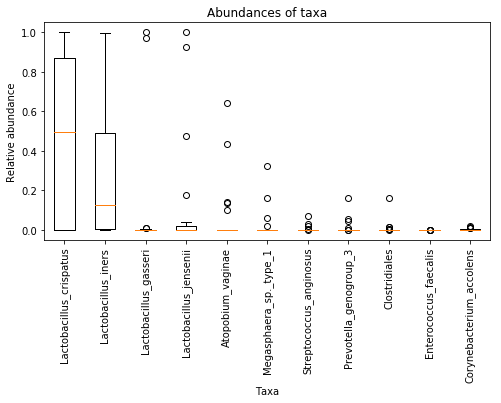

In [43]:
min_x, max_x = ax_0.get_xlim()
ax_0.hlines(0.5, min_x, max_x, linestyle='-', color='gray')

fig

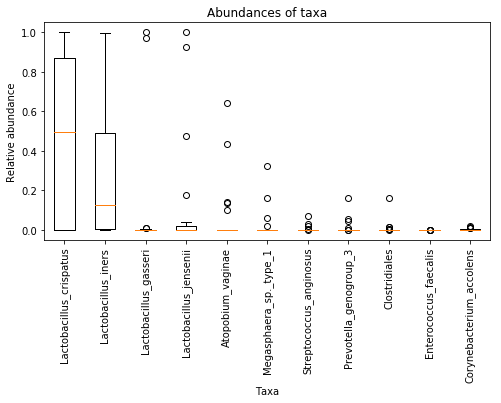

In [44]:
min_y, max_y  = ax_1.get_ylim()
ax_1.vlines(2.5, min_y, max_y, linestyle='-', color='gray')
ax_1.annotate('top 3 taxa', (3, (min_y+max_y)/2), fontsize='medium' )

fig

### Save to a file

matplotlib uses the *savefig(filename)* method in the figure (not the subplots, of course) to save the entire figure to a file named 'filename'. It determines what type of file to create based on the file's extension. Some extensions and image types are:

extension | image type
:-------- | :-------------
png | creates a png file
pdf | creates a pdf file
jpeg | jpeg file

There are many parameters to *savefig* that you can set.

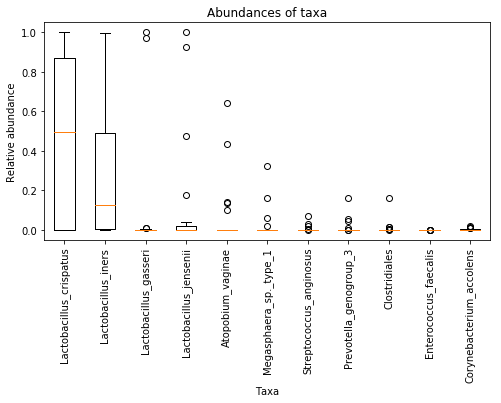

In [39]:
fig

In [38]:
fig.savefig('microbiome_figure.png')
fig.savefig('microbiome_figure.pdf')

## Other types of plots

check out [Matplotlib Gallery](http://matplotlib.org/gallery.html) at *http://matplotlib.org/gallery.html*

In [25]:
x=pd.read_csv('microbiome_data.txt', 
              comment='#', 
              sep='\t', 
              header=0,
              index_col=0
             )

# make useful sub-dataframes
x_abundances = x.iloc[:,:-3]
x_diversity = x.iloc[:,-3:]
x.head()

,Lactobacillus_crispatus,Lactobacillus_iners,Lactobacillus_gasseri,Lactobacillus_jensenii,Atopobium_vaginae,Megasphaera_sp._type_1,Streptococcus_anginosus,Prevotella_genogroup_3,Clostridiales,Enterococcus_faecalis,Corynebacterium_accolens,Total,Shannon,Simpson
patientID,,,,,,,,,,,,,,
AYAC01,0.494516,0.046142,0.001394,0.000831,0.099390,0.323563,0.000025,0.001861,0.013861,0.000073,0.018342,23288,1.248970,2.764084
AYAC02,0.675226,0.284146,0.001843,0.037587,0.000045,0.000000,0.000029,0.000000,0.000000,0.000445,0.000680,40926,0.772622,1.858435
AYAC03,0.298899,0.336644,0.000821,0.000069,0.143627,0.161324,0.000479,0.044008,0.004456,0.000041,0.009631,25299,1.521095,3.978104
AYAC04,0.882867,0.091084,0.004370,0.021186,0.000000,0.000049,0.000025,0.000000,0.000105,0.000050,0.000265,35911,0.444000,1.268679
AYAC05,0.001224,0.774687,0.001111,0.177701,0.000578,0.000000,0.029465,0.000000,0.000759,0.001376,0.013099,26537,0.704869,1.580368


In [26]:
abundance_averages = x_abundances.mean(axis=1)
abundance_averages

abundance_max = x_abundances.max(axis=1)
abundance_min = x_abundances.min(axis=1)

### Scatter plots

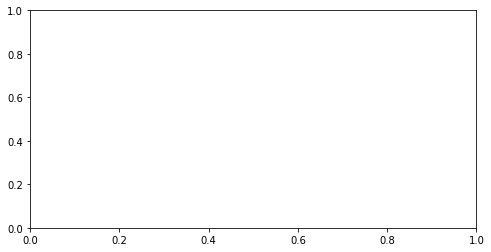

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(8,4))
ax = axes

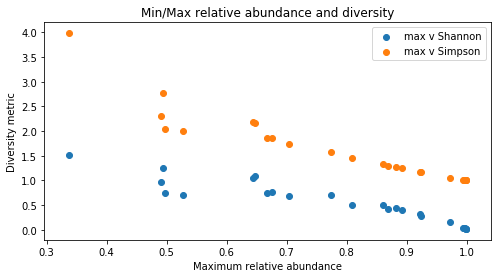

In [28]:
ax.scatter(abundance_max, x_diversity.Shannon, label='max v Shannon')
ax.scatter(abundance_max, x_diversity.Simpson, label='max v Simpson')
ax.set_title('Min/Max relative abundance and diversity')
ax.set_xlabel('Maximum relative abundance')
ax.set_ylabel('Diversity metric')
ax.legend()
fig

### Line Plots with points

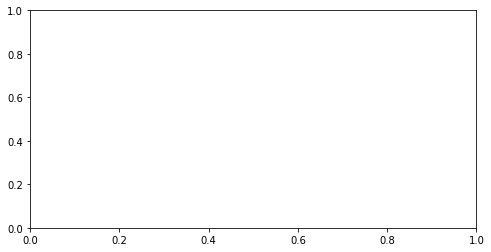

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(8,4))
ax = axes

size: 7


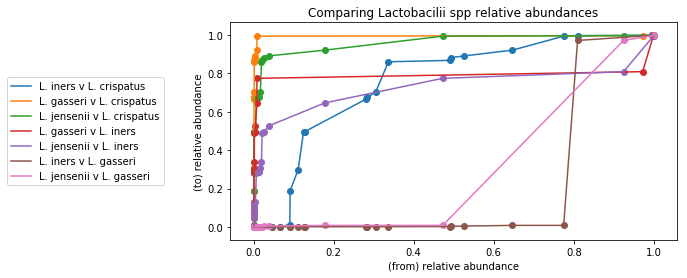

In [30]:
taxa = [('L. crispatus', x_abundances.Lactobacillus_crispatus.sort_values()),
           ('L. iners', x_abundances.Lactobacillus_iners.sort_values()),
           ('L. gasseri', x_abundances.Lactobacillus_gasseri.sort_values()),
           ('L. jensenii', x_abundances.Lactobacillus_jensenii.sort_values()),
          ]
comparisons = [(from_t, to_t) 
               for from_t in taxa[:-1] 
               for to_t in taxa[1:] 
               if from_t != to_t]
print('size:', len(comparisons))
#print(comparisons)
for from_comparison, to_comparison in comparisons:
    from_taxon, from_data = from_comparison
    to_taxon, to_data = to_comparison
    ax.scatter(to_data, from_data,
                label=None,
                )
    ax.plot(to_data, from_data,
            label='{} v {}'.format(to_taxon, from_taxon),
             )

ax.set_title('Comparing Lactobacilii spp relative abundances')
ax.set_xlabel('(from) relative abundance')
ax.set_ylabel('(to) relative abundance')
ax.legend(loc=(-0.5,0.25))
fig


### Histograms

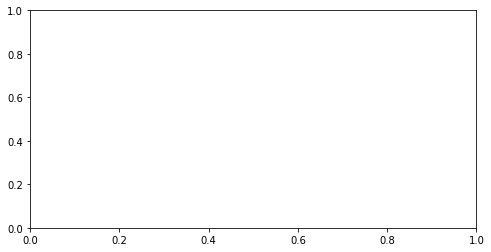

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(8,4))
ax = axes

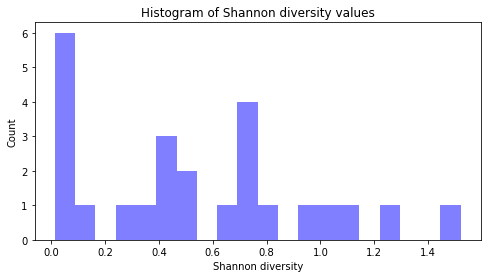

In [32]:
_=ax.hist(x_diversity.Shannon, bins=20, color='b', alpha=0.5, )
ax.set_title('Histogram of Shannon diversity values')
ax.set_xlabel('Shannon diversity')
ax.set_ylabel('Count')

fig

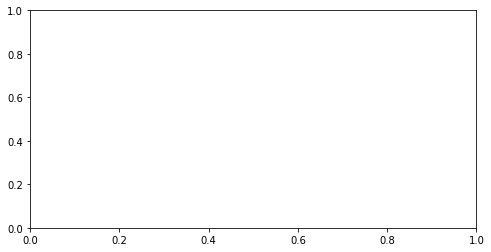

In [33]:
fig, axes = plt.subplots(1, 1, figsize=(8,4))
ax = axes

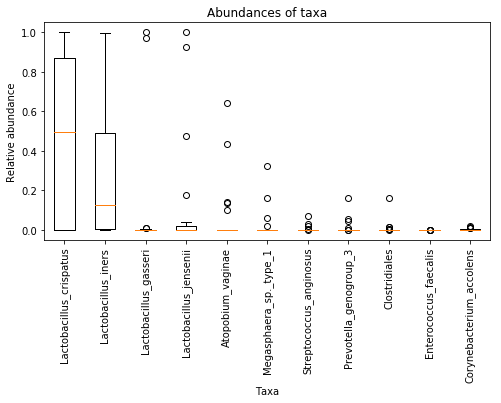

In [34]:
ax.boxplot(x_abundances.T)
ax.set_title('Abundances of taxa')
ax.set_xlabel('Taxa')
ax.set_ylabel('Relative abundance')
ax.set_xticklabels(x_abundances.columns, rotation=90)
fig

## Mixing pandas and matplotlib plots

pandas plots return matplotlib subplots, which you can manipulate directly.

In [37]:
x_abundances.head()

,Lactobacillus_crispatus,Lactobacillus_iners,Lactobacillus_gasseri,Lactobacillus_jensenii,Atopobium_vaginae,Megasphaera_sp._type_1,Streptococcus_anginosus,Prevotella_genogroup_3,Clostridiales,Enterococcus_faecalis,Corynebacterium_accolens
patientID,,,,,,,,,,,
AYAC01,0.494516,0.046142,0.001394,0.000831,0.099390,0.323563,0.000025,0.001861,0.013861,0.000073,0.018342
AYAC02,0.675226,0.284146,0.001843,0.037587,0.000045,0.000000,0.000029,0.000000,0.000000,0.000445,0.000680
AYAC03,0.298899,0.336644,0.000821,0.000069,0.143627,0.161324,0.000479,0.044008,0.004456,0.000041,0.009631
AYAC04,0.882867,0.091084,0.004370,0.021186,0.000000,0.000049,0.000025,0.000000,0.000105,0.000050,0.000265
AYAC05,0.001224,0.774687,0.001111,0.177701,0.000578,0.000000,0.029465,0.000000,0.000759,0.001376,0.013099


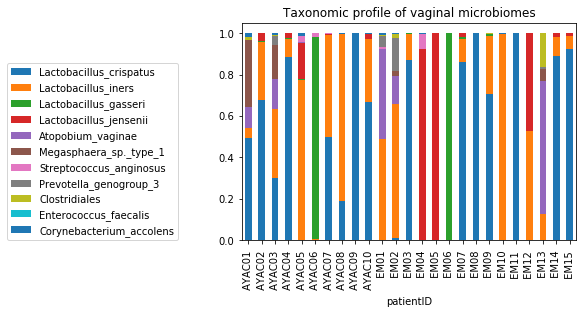

In [35]:
subplot = x_abundances.plot(kind='bar', stacked=True, legend=None)
subplot.set_title('Taxonomic profile of vaginal microbiomes')
subplot.legend(loc=(-0.7,0))


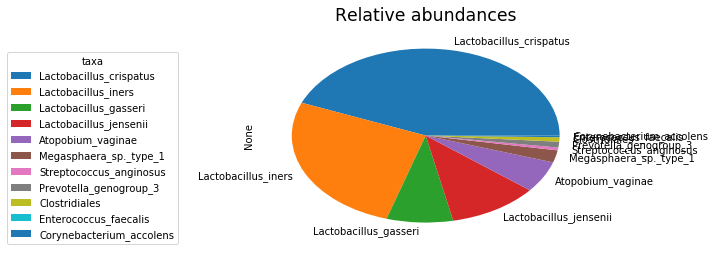

In [36]:
ax = x_abundances.mean().plot(kind='pie',)
ax.set_title('Relative abundances', fontsize='xx-large')
ax.legend(loc=(-0.75,0), title='taxa')
